In [1]:
## Analysis of sentiment from medical review data
## Label the data with a lexicon based scoring approach and then using the labels for a supervised learning model.

# Data Collection

In [2]:
# import resources
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('MedicalReviews.csv',index_col=0)
pd.set_option("display.max_colwidth",300)

In [3]:
df.shape

(494, 2)

# Data pre-processing

In [4]:
#for any specific pattern removal if found in future
def remove_substr(inpstr, substr):
    r= re.findall(substr, inpstr)
    for i in r:
        inpstr= re.sub(i, '', inpstr)
    return inpstr

In [5]:
df['Tidy Review']=df['Review'].str.replace("[^a-zA-Z]"," ")

In [6]:
df.head(10)

,MEdID,Review,Tidy Review
0,MED_1,"I cannot say enough good things about Intown PT. Ingrid is a magician. When I injured my shoulder, I thought I could fix it with no issues. I stretched, did sauna, cryo, reiki massage, sports massage, even energy healing. I went to Ingrid 2 hours ago and already feel 90% better. I don't understa...",I cannot say enough good things about Intown PT Ingrid is a magician When I injured my shoulder I thought I could fix it with no issues I stretched did sauna cryo reiki massage sports massage even energy healing I went to Ingrid hours ago and already feel better I don t understa...
1,MED_1,"After an urgent care visit for a pulled muscle in my neck, I called Intown PT. Muscle relaxers, pain meds - nothing was helping. Two dry needling sessions in, I was good as new. Almost miraculous, frankly. Highly recommend.",After an urgent care visit for a pulled muscle in my neck I called Intown PT Muscle relaxers pain meds nothing was helping Two dry needling sessions in I was good as new Almost miraculous frankly Highly recommend
2,MED_1,"Both Ingrid and Jennifer are great. They used dry needling and other techniques to cure my back pain. I had gone to chiropractors and physical therapy for years with limited relief. But after a few sessions with them, my back stopped hurting for the first time in many years. I still have a sensi...",Both Ingrid and Jennifer are great They used dry needling and other techniques to cure my back pain I had gone to chiropractors and physical therapy for years with limited relief But after a few sessions with them my back stopped hurting for the first time in many years I still have a sensi...
3,MED_1,Intown PT is fantastic! They helped me regain mobility in my hips that I thought was out of my reach. I highly recommend them to anyone who leads an active lifestyle.,Intown PT is fantastic They helped me regain mobility in my hips that I thought was out of my reach I highly recommend them to anyone who leads an active lifestyle
4,MED_1,"OK, here's the deal: by looking at the red-cord contraption hanging from the ceiling, you'd think it was a S&M sex machine. (Not that I'd know - honest.) But after 2+ months of a disastrous lower back situation--to the point where I thought I was in traction--the *entire problem literally melted...",OK here s the deal by looking at the red cord contraption hanging from the ceiling you d think it was a S M sex machine Not that I d know honest But after months of a disastrous lower back situation to the point where I thought I was in traction the entire problem literally melted...
5,MED_1,I went to see Ingrid after having back and sciatic pain that would not go away. I was having trouble even getting in and out of my car. She performed a thorough intake and and was very interested in helping to find the right treatment for my issue. She did a needling technique I had never tried ...,I went to see Ingrid after having back and sciatic pain that would not go away I was having trouble even getting in and out of my car She performed a thorough intake and and was very interested in helping to find the right treatment for my issue She did a needling technique I had never tried ...
6,MED_1,Dr. Ingrid is an exceptional doctor. She used a technique known as dry-needling that totally healed my back. The office is in a great location and the entire staff is friendly. If you want a healing find Dr. E!,Dr Ingrid is an exceptional doctor She used a technique known as dry needling that totally healed my back The office is in a great location and the entire staff is friendly If you want a healing find Dr E
7,MED_1,"I was suffering from upper back pain between and around my shoulders that was causing me to pop Advil and Tylenol throughout the day like snacks and that was impacting my ability to concentrate. I saw Dr. Anderson and she did an amazing job treating me for the pain. By the time, I left that firs...",I was suffering from upper back pain between and around 

In [7]:
sw= ["myself", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "him", "his", "himself", "she", "her", 
     "hers", "herself", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", 
     "this", "that", "these", "those", "are", "was", "were", "been", "being", "have", "has", "had", "having", "does", 
     "did", "doing", "the", "and", "because", "until", "while", "for", "with", "about", "against", "between", 
     "into", "through", "during", "before", "after", "from", "down", "out", "off", "again", "further", "then", "once", 
     "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "other", "only", "own", "than", 
     "can", "will", "just", "should", "now", "see", "saw", "pain", "injury", "injure", "injured", "body", "feet", "waist", 
     "hand", "hands", "chest", "head", "shoulder", "back", "muscle", "therapy", "massage", "wrist", "stomach", "knee",
    "problem", "issue", "ailment", "ailments", "therapist", "doctor", "fever", "ache", "cramp", "nothing", "help",
    "arm", "arms", "bone", "fracture", "swelling", "swell", "illness", "legs", "leg", "severe", "accident", "stroke",
    "I", "me", "it", "on", "at", "in", "if", "or", "he", "my", "a", "an", "is", "of", "ankle", "broken", "Dr", "m", "t", "s",
    "to", "for", "etc", "R", "ve"]
def stopword_removal(s):
    newstr= ''
    for w in s.split():
        if w not in sw:
            newstr= newstr+w+' '
    return newstr

In [8]:
df['Tidy Review']=df['Tidy Review'].apply(stopword_removal)

In [9]:
df.head(10)

,MEdID,Review,Tidy Review
0,MED_1,"I cannot say enough good things about Intown PT. Ingrid is a magician. When I injured my shoulder, I thought I could fix it with no issues. I stretched, did sauna, cryo, reiki massage, sports massage, even energy healing. I went to Ingrid 2 hours ago and already feel 90% better. I don't understa...",cannot say enough good things Intown PT Ingrid magician When thought could fix no issues stretched sauna cryo reiki sports even energy healing went Ingrid hours ago already feel better don understand someone be so good job
1,MED_1,"After an urgent care visit for a pulled muscle in my neck, I called Intown PT. Muscle relaxers, pain meds - nothing was helping. Two dry needling sessions in, I was good as new. Almost miraculous, frankly. Highly recommend.",After urgent care visit pulled neck called Intown PT Muscle relaxers meds helping Two dry needling sessions good as new Almost miraculous frankly Highly recommend
2,MED_1,"Both Ingrid and Jennifer are great. They used dry needling and other techniques to cure my back pain. I had gone to chiropractors and physical therapy for years with limited relief. But after a few sessions with them, my back stopped hurting for the first time in many years. I still have a sensi...",Both Ingrid Jennifer great They used dry needling techniques cure gone chiropractors physical years limited relief But sessions stopped hurting first time many years still sensitive but like seeing One more thing receptionist Katy very efficient easy work
3,MED_1,Intown PT is fantastic! They helped me regain mobility in my hips that I thought was out of my reach. I highly recommend them to anyone who leads an active lifestyle.,Intown PT fantastic They helped regain mobility hips thought reach highly recommend anyone leads active lifestyle
4,MED_1,"OK, here's the deal: by looking at the red-cord contraption hanging from the ceiling, you'd think it was a S&M sex machine. (Not that I'd know - honest.) But after 2+ months of a disastrous lower back situation--to the point where I thought I was in traction--the *entire problem literally melted...",OK deal by looking red cord contraption hanging ceiling d think S M sex machine Not d know honest But months disastrous lower situation point thought traction entire literally melted away Ingrid Anderson not good phenomenally great person talk confide as well Trustworthy smart dynamic Bring issu...
5,MED_1,I went to see Ingrid after having back and sciatic pain that would not go away. I was having trouble even getting in and out of my car. She performed a thorough intake and and was very interested in helping to find the right treatment for my issue. She did a needling technique I had never tried ...,went Ingrid sciatic would not go away trouble even getting car She performed thorough intake very interested helping find right treatment She needling technique never tried next day gone After one more follow up visit some exercises do home much better She very kind attentive made feel immediate...
6,MED_1,Dr. Ingrid is an exceptional doctor. She used a technique known as dry-needling that totally healed my back. The office is in a great location and the entire staff is friendly. If you want a healing find Dr. E!,Ingrid exceptional She used technique known as dry needling totally healed The office great location entire staff friendly If want healing find E
7,MED_1,"I was suffering from upper back pain between and around my shoulders that was causing me to pop Advil and Tylenol throughout the day like snacks and that was impacting my ability to concentrate. I saw Dr. Anderson and she did an amazing job treating me for the pain. By the time, I left that firs...",suffering upper around shoulders causing pop Advil Tylenol throughout day like snacks impacting ability concentrate Anderson amazing job treating By time left first visit dramatically improved completely gone by time second visit days later Anderson very detail oriented patiently soliciting deta

In [10]:
def tokenizer(s):
    return s.split()

In [11]:
review_tokens= df['Tidy Review'].apply(tokenizer)
review_tokens.head()

0                                           [cannot, say, enough, good, things, Intown, PT, Ingrid, magician, When, thought, could, fix, no, issues, stretched, sauna, cryo, reiki, sports, even, energy, healing, went, Ingrid, hours, ago, already, feel, better, don, understand, someone, be, so, good, job]
1                                                                                                                   [After, urgent, care, visit, pulled, neck, called, Intown, PT, Muscle, relaxers, meds, helping, Two, dry, needling, sessions, good, as, new, Almost, miraculous, frankly, Highly, recommend]
2         [Both, Ingrid, Jennifer, great, They, used, dry, needling, techniques, cure, gone, chiropractors, physical, years, limited, relief, But, sessions, stopped, hurting, first, time, many, years, still, sensitive, but, like, seeing, One, more, thing, receptionist, Katy, very, efficient, easy, work]
3                                                                                    

In [12]:
#STEMMING: stemming doesn't need POS tagging
#from nltk.stem.snowball import *
#stemmer= SnowballStemmer("english", ignore_stopwords= True)
#def stemming(tokens):
    #stemmedtokens= []
    #for i in tokens:
        #stemmedtokens.append(stemmer.stem(i))
    #return stemmedtokens
#review_tokens= review_tokens.apply(stemming)
#review_tokens.head()

In [13]:
def postagger(revt):
    return nltk.pos_tag(revt)

In [14]:
#import nltk
#nltk.download('all')

In [15]:
tagged_tokens= review_tokens.apply(postagger)
tagged_tokens.head() #tokens and pos

0    [(cannot, NNS), (say, VBP), (enough, RB), (good, JJ), (things, NNS), (Intown, NNP), (PT, NNP), (Ingrid, NNP), (magician, NN), (When, WRB), (thought, NN), (could, MD), (fix, VB), (no, DT), (issues, NNS), (stretched, VBD), (sauna, JJ), (cryo, NN), (reiki, NN), (sports, NNS), (even, RB), (energy, N...
1    [(After, IN), (urgent, JJ), (care, NN), (visit, NN), (pulled, VBD), (neck, RB), (called, VBN), (Intown, NNP), (PT, NNP), (Muscle, NNP), (relaxers, NNS), (meds, NNS), (helping, VBG), (Two, CD), (dry, JJ), (needling, VBG), (sessions, NNS), (good, JJ), (as, IN), (new, JJ), (Almost, NNP), (miraculou...
2    [(Both, DT), (Ingrid, NNP), (Jennifer, NNP), (great, JJ), (They, PRP), (used, VBD), (dry, JJ), (needling, VBG), (techniques, NNS), (cure, VBP), (gone, VBN), (chiropractors, NNS), (physical, JJ), (years, NNS), (limited, JJ), (relief, NN), (But, CC), (sessions, NNS), (stopped, VBD), (hurting, VBG)...
3                                                                      [(Intown, NNP)

In [16]:
def to_wordnet_tag(tag): #conversion of nltk pos tags to wordnet pos tags for lemmatization using wordnet
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return ''

In [17]:
#lemmatization and removal of conjunctions, determiners, interjections, modals
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
def lemmatize(rt):
    rtl=[]
    for i in range(len(rt)):
        w= rt[i][0]
        ps= to_wordnet_tag(rt[i][1])
        if ps=='':
            continue
        lemma= lemmatizer.lemmatize(w,pos= ps)
        rtl.append(lemma)
    return nltk.pos_tag(rtl)
token_lemmatized= tagged_tokens.apply(lemmatize)
token_lemmatized.head() #lemmas and pos

0    [(cannot, NNS), (say, VBP), (enough, RB), (good, JJ), (thing, NN), (Intown, NNP), (PT, NNP), (Ingrid, NNP), (magician, JJ), (thought, VBD), (fix, JJ), (issue, NN), (stretch, NN), (sauna, VBD), (cryo, JJ), (reiki, NN), (sport, NN), (even, RB), (energy, NN), (heal, NN), (go, VB), (Ingrid, NNP), (h...
1    [(urgent, JJ), (care, NN), (visit, NN), (pull, NN), (neck, NN), (call, NN), (Intown, NNP), (PT, NNP), (Muscle, NNP), (relaxer, NN), (med, VBD), (help, NN), (dry, VB), (needle, JJ), (session, NN), (good, VBD), (new, JJ), (Almost, NNP), (miraculous, JJ), (frankly, RB), (Highly, NNP), (recommend, VB)]
2    [(Ingrid, NNP), (Jennifer, NNP), (great, JJ), (use, NN), (dry, JJ), (needle, NN), (technique, NN), (cure, NN), (go, VBP), (chiropractor, NN), (physical, JJ), (year, NN), (limited, JJ), (relief, NN), (session, NN), (stop, VB), (hurt, NN), (first, JJ), (time, NN), (many, JJ), (year, NN), (still, R...
3                                                                                    

In [18]:
def detokenizer(t):
    dt= ''
    for i in t:
        dt= dt+' '+i[0] #taking the lemma, leaving the pos tag
    return dt.strip()

In [19]:
df['Tidy Review']= token_lemmatized.apply(detokenizer)

In [20]:
df['Tidy Review']=df['Tidy Review'].apply(stopword_removal)

In [21]:
df.head(15)

,MEdID,Review,Tidy Review
0,MED_1,"I cannot say enough good things about Intown PT. Ingrid is a magician. When I injured my shoulder, I thought I could fix it with no issues. I stretched, did sauna, cryo, reiki massage, sports massage, even energy healing. I went to Ingrid 2 hours ago and already feel 90% better. I don't understa...",cannot say enough good thing Intown PT Ingrid magician thought fix stretch sauna cryo reiki sport even energy heal go Ingrid hour ago already feel good don understand someone be so good job
1,MED_1,"After an urgent care visit for a pulled muscle in my neck, I called Intown PT. Muscle relaxers, pain meds - nothing was helping. Two dry needling sessions in, I was good as new. Almost miraculous, frankly. Highly recommend.",urgent care visit pull neck call Intown PT Muscle relaxer med dry needle session good new Almost miraculous frankly Highly recommend
2,MED_1,"Both Ingrid and Jennifer are great. They used dry needling and other techniques to cure my back pain. I had gone to chiropractors and physical therapy for years with limited relief. But after a few sessions with them, my back stopped hurting for the first time in many years. I still have a sensi...",Ingrid Jennifer great use dry needle technique cure go chiropractor physical year limited relief session stop hurt first time many year still sensitive more thing receptionist Katy very efficient easy work
3,MED_1,Intown PT is fantastic! They helped me regain mobility in my hips that I thought was out of my reach. I highly recommend them to anyone who leads an active lifestyle.,Intown PT fantastic regain mobility hip think reach highly recommend anyone lead active lifestyle
4,MED_1,"OK, here's the deal: by looking at the red-cord contraption hanging from the ceiling, you'd think it was a S&M sex machine. (Not that I'd know - honest.) But after 2+ months of a disastrous lower back situation--to the point where I thought I was in traction--the *entire problem literally melted...",OK deal look red cord contraption hang ceiling d think S M sex machine Not d know honest month disastrous low situation point think traction entire literally melt away Ingrid Anderson not good phenomenally great person talk confide as well Trustworthy smart dynamic Bring ll know fix surprising d...
5,MED_1,I went to see Ingrid after having back and sciatic pain that would not go away. I was having trouble even getting in and out of my car. She performed a thorough intake and and was very interested in helping to find the right treatment for my issue. She did a needling technique I had never tried ...,go Ingrid sciatic not go away trouble even get car perform thorough intake very interested find right treatment needle technique never try next day go more follow up visit exercise do home much good very kind attentive make feel immediately ease Would highly recommend
6,MED_1,Dr. Ingrid is an exceptional doctor. She used a technique known as dry-needling that totally healed my back. The office is in a great location and the entire staff is friendly. If you want a healing find Dr. E!,Ingrid exceptional use technique know dry needle totally heal office great location entire staff friendly want healing find E
7,MED_1,"I was suffering from upper back pain between and around my shoulders that was causing me to pop Advil and Tylenol throughout the day like snacks and that was impacting my ability to concentrate. I saw Dr. Anderson and she did an amazing job treating me for the pain. By the time, I left that firs...",suffer upper cause pop Advil Tylenol day snack impact ability concentrate Anderson amaze job treat time leave first visit dramatically improve completely go time second visit day later Anderson very detail orient patiently solicit detail provide information believe root trouble suggest go approa...
8,MED_1,"Physical Therapy is a tricky one for me. I think I'm like most people when I say, all I want is fast results and very little homework. Dr. Anderson understood this all

# Decision based labelling using sentiwordnet

In [22]:
from nltk.corpus import sentiwordnet as swn

In [23]:
def sentiscore(t):
    s=0
    for w in t:
        lemma= w[0]
        pos= to_wordnet_tag(w[1])
        try:
            pscore= swn.senti_synset(lemma+'.'+pos+'.01').pos_score()
            nscore= swn.senti_synset(lemma+'.'+pos+'.01').neg_score()
        except:
            pscore= 0
            nscore= 0
        s= s + pscore - nscore
    return s

In [24]:
df['scores']= token_lemmatized.apply(sentiscore)

In [25]:
df.head(15)

,MEdID,Review,Tidy Review,scores
0,MED_1,"I cannot say enough good things about Intown PT. Ingrid is a magician. When I injured my shoulder, I thought I could fix it with no issues. I stretched, did sauna, cryo, reiki massage, sports massage, even energy healing. I went to Ingrid 2 hours ago and already feel 90% better. I don't understa...",cannot say enough good thing Intown PT Ingrid magician thought fix stretch sauna cryo reiki sport even energy heal go Ingrid hour ago already feel good don understand someone be so good job,3.250
1,MED_1,"After an urgent care visit for a pulled muscle in my neck, I called Intown PT. Muscle relaxers, pain meds - nothing was helping. Two dry needling sessions in, I was good as new. Almost miraculous, frankly. Highly recommend.",urgent care visit pull neck call Intown PT Muscle relaxer med dry needle session good new Almost miraculous frankly Highly recommend,1.250
2,MED_1,"Both Ingrid and Jennifer are great. They used dry needling and other techniques to cure my back pain. I had gone to chiropractors and physical therapy for years with limited relief. But after a few sessions with them, my back stopped hurting for the first time in many years. I still have a sensi...",Ingrid Jennifer great use dry needle technique cure go chiropractor physical year limited relief session stop hurt first time many year still sensitive more thing receptionist Katy very efficient easy work,-0.500
3,MED_1,Intown PT is fantastic! They helped me regain mobility in my hips that I thought was out of my reach. I highly recommend them to anyone who leads an active lifestyle.,Intown PT fantastic regain mobility hip think reach highly recommend anyone lead active lifestyle,1.625
4,MED_1,"OK, here's the deal: by looking at the red-cord contraption hanging from the ceiling, you'd think it was a S&M sex machine. (Not that I'd know - honest.) But after 2+ months of a disastrous lower back situation--to the point where I thought I was in traction--the *entire problem literally melted...",OK deal look red cord contraption hang ceiling d think S M sex machine Not d know honest month disastrous low situation point think traction entire literally melt away Ingrid Anderson not good phenomenally great person talk confide as well Trustworthy smart dynamic Bring ll know fix surprising d...,-0.875
5,MED_1,I went to see Ingrid after having back and sciatic pain that would not go away. I was having trouble even getting in and out of my car. She performed a thorough intake and and was very interested in helping to find the right treatment for my issue. She did a needling technique I had never tried ...,go Ingrid sciatic not go away trouble even get car perform thorough intake very interested find right treatment needle technique never try next day go more follow up visit exercise do home much good very kind attentive make feel immediately ease Would highly recommend,1.000
6,MED_1,Dr. Ingrid is an exceptional doctor. She used a technique known as dry-needling that totally healed my back. The office is in a great location and the entire staff is friendly. If you want a healing find Dr. E!,Ingrid exceptional use technique know dry needle totally heal office great location entire staff friendly want healing find E,1.000
7,MED_1,"I was suffering from upper back pain between and around my shoulders that was causing me to pop Advil and Tylenol throughout the day like snacks and that was impacting my ability to concentrate. I saw Dr. Anderson and she did an amazing job treating me for the pain. By the time, I left that firs...",suffer upper cause pop Advil Tylenol day snack impact ability concentrate Anderson amaze job treat time leave first visit dramatically improve completely go time second visit day later Anderson very detail orient patiently solicit detail provide information believe root trouble suggest go approa...,1.375
8,MED_1,"Physical Therapy is a tricky one for me. I think I'm like most people when I say, all I want is fast results a

In [26]:
def labelling(s):
    if s<-1.375:
        return 0
    else:
        return 1

In [27]:
df['Sentiment']= df['scores'].apply(labelling)

In [28]:
df=df.drop('scores',axis=1)

In [29]:
df.head()
#postive=1
#negative=0

,MEdID,Review,Tidy Review,Sentiment
0,MED_1,"I cannot say enough good things about Intown PT. Ingrid is a magician. When I injured my shoulder, I thought I could fix it with no issues. I stretched, did sauna, cryo, reiki massage, sports massage, even energy healing. I went to Ingrid 2 hours ago and already feel 90% better. I don't understa...",cannot say enough good thing Intown PT Ingrid magician thought fix stretch sauna cryo reiki sport even energy heal go Ingrid hour ago already feel good don understand someone be so good job,1
1,MED_1,"After an urgent care visit for a pulled muscle in my neck, I called Intown PT. Muscle relaxers, pain meds - nothing was helping. Two dry needling sessions in, I was good as new. Almost miraculous, frankly. Highly recommend.",urgent care visit pull neck call Intown PT Muscle relaxer med dry needle session good new Almost miraculous frankly Highly recommend,1
2,MED_1,"Both Ingrid and Jennifer are great. They used dry needling and other techniques to cure my back pain. I had gone to chiropractors and physical therapy for years with limited relief. But after a few sessions with them, my back stopped hurting for the first time in many years. I still have a sensi...",Ingrid Jennifer great use dry needle technique cure go chiropractor physical year limited relief session stop hurt first time many year still sensitive more thing receptionist Katy very efficient easy work,1
3,MED_1,Intown PT is fantastic! They helped me regain mobility in my hips that I thought was out of my reach. I highly recommend them to anyone who leads an active lifestyle.,Intown PT fantastic regain mobility hip think reach highly recommend anyone lead active lifestyle,1
4,MED_1,"OK, here's the deal: by looking at the red-cord contraption hanging from the ceiling, you'd think it was a S&M sex machine. (Not that I'd know - honest.) But after 2+ months of a disastrous lower back situation--to the point where I thought I was in traction--the *entire problem literally melted...",OK deal look red cord contraption hang ceiling d think S M sex machine Not d know honest month disastrous low situation point think traction entire literally melt away Ingrid Anderson not good phenomenally great person talk confide as well Trustworthy smart dynamic Bring ll know fix surprising d...,1


In [30]:
posdf= df[df['Sentiment']==1]
negdf= df[df['Sentiment']==0]
posdf.shape, negdf.shape

((464, 4), (30, 4))

# Word cloud Visualization

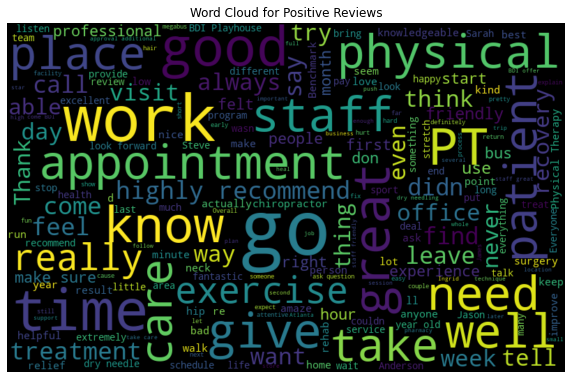

In [31]:
word_bank1= ' '.join([text for text in posdf['Tidy Review']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_bank1) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

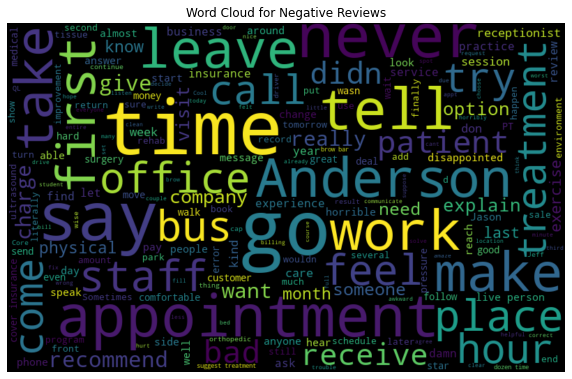

In [32]:
word_bank2= ' '.join([text for text in negdf['Tidy Review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_bank2) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [33]:
l= []
for line in review_tokens:
    for w in line:
        if w not in l:
            l.append(w)
print(len(l)) #no of unique tokens in entire dataset

4945


# Bag of Words (BOW)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [35]:
#Bag of Words features
bow_features= CountVectorizer() #min_df=1, max_df= 1.0
bow= bow_features.fit_transform(df['Tidy Review'])
bow.shape

(494, 3648)

### Train-test split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X= bow.toarray()
y= df['Sentiment']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)

###  SVM

In [38]:
from sklearn import svm
from sklearn import metrics
svcmodel= svm.SVC(kernel='linear')
svcmodel.fit(X_train, y_train)
svmpred= svcmodel.predict(X_test)
print ("Accuracy=",metrics.accuracy_score(y_test,svmpred))
print ("Precision=",metrics.precision_score(y_test,svmpred))
print ("Recall=",metrics.recall_score(y_test,svmpred))

Accuracy= 0.9328859060402684
Precision= 0.9383561643835616
Recall= 0.9927536231884058


In [39]:
from sklearn.model_selection import KFold
cv= KFold(n_splits=3, random_state=42, shuffle= True)
sn= 0
for train_ind, test_ind in cv.split(X):
    x_train, x_test, ytrain, ytest= X[train_ind], X[test_ind], y[train_ind], y[test_ind]
    svcmodel.fit(x_train, ytrain)
    svmpred= svcmodel.predict(x_test)
    sn+=1
    print ("Split Number ",sn)
    print ("Accuracy=",metrics.accuracy_score(ytest,svmpred))
    print ("Precision=",metrics.precision_score(ytest,svmpred))
    print ("Recall=",metrics.recall_score(ytest,svmpred))

Split Number  1
Accuracy= 0.9696969696969697
Precision= 0.96875
Recall= 1.0
Split Number  2
Accuracy= 0.9272727272727272
Precision= 0.9316770186335404
Recall= 0.9933774834437086
Split Number  3
Accuracy= 0.9390243902439024
Precision= 0.9805194805194806
Recall= 0.9556962025316456


### Logistic Regression (LR)

In [40]:
from sklearn.linear_model import LogisticRegression
lrmodel= LogisticRegression(solver= 'liblinear')
lrmodel.fit(X_train,y_train)
lrpred= lrmodel.predict(X_test)
print ("Accuracy=",metrics.accuracy_score(y_test,lrpred))
print ("Precision=",metrics.precision_score(y_test,lrpred))
print ("Recall=",metrics.recall_score(y_test,lrpred))

Accuracy= 0.9395973154362416
Precision= 0.9387755102040817
Recall= 1.0


In [41]:
cv= KFold(n_splits=3, random_state=42, shuffle= True)
sn= 0
for train_ind, test_ind in cv.split(X):
    x_train, x_test, ytrain, ytest= X[train_ind], X[test_ind], y[train_ind], y[test_ind]
    lrmodel.fit(x_train, ytrain)
    lrpred= lrmodel.predict(x_test)
    sn+=1
    print ("Split Number ",sn)
    print ("Accuracy=",metrics.accuracy_score(ytest,lrpred))
    print ("Precision=",metrics.precision_score(ytest,lrpred))
    print ("Recall=",metrics.recall_score(ytest,lrpred))

Split Number  1
Accuracy= 0.9696969696969697
Precision= 0.96875
Recall= 1.0
Split Number  2
Accuracy= 0.9333333333333333
Precision= 0.9320987654320988
Recall= 1.0
Split Number  3
Accuracy= 0.9634146341463414
Precision= 0.9810126582278481
Recall= 0.9810126582278481


### Random Forest (RF)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfmodel= RandomForestClassifier(n_estimators= 20, random_state= 11)
rfmodel.fit(X_train, y_train)
rfpred= rfmodel.predict(X_test)
print ("Accuracy=",metrics.accuracy_score(y_test,rfpred))
print ("Precision=",metrics.precision_score(y_test,rfpred))
print ("Recall=",metrics.recall_score(y_test,rfpred))

Accuracy= 0.9395973154362416
Precision= 0.9387755102040817
Recall= 1.0


In [44]:
cv= KFold(n_splits=3, random_state=42, shuffle= True)
sn= 0
for train_ind, test_ind in cv.split(X):
    x_train, x_test, ytrain, ytest= X[train_ind], X[test_ind], y[train_ind], y[test_ind]
    rfmodel.fit(x_train, ytrain)
    rfpred= rfmodel.predict(x_test)
    sn+=1
    print ("Split Number ",sn)
    print ("Accuracy=",metrics.accuracy_score(ytest,rfpred))
    print ("Precision=",metrics.precision_score(ytest,rfpred))
    print ("Recall=",metrics.recall_score(ytest,rfpred))

Split Number  1
Accuracy= 0.9636363636363636
Precision= 0.9627329192546584
Recall= 1.0
Split Number  2
Accuracy= 0.9333333333333333
Precision= 0.9320987654320988
Recall= 1.0
Split Number  3
Accuracy= 0.975609756097561
Precision= 0.9753086419753086
Recall= 1.0


### XGBoost

In [45]:
#!conda install -c conda-forge xgboost -y

In [44]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from xgboost import XGBClassifier

In [ ]:
xgbmodel= XGBClassifier(max_depth= 6, n_estimators= 500)
xgbmodel.fit(X_train, y_train)
xgbpred= xgbmodel.predict(X_test)
print ("Accuracy=",metrics.accuracy_score(y_test,xgbpred))
print ("Precision=",metrics.precision_score(y_test,xgbpred))
print ("Recall=",metrics.recall_score(y_test,xgbpred))

# Word2Vec Features

In [ ]:
from gensim.models import Word2Vec

In [ ]:
w2v= Word2Vec(review_tokens, size= 256, window= 5, sg= 1, hs= 0, negative= 20, workers= 2)
w2v.train(review_tokens, total_examples= len(df['Tidy Review']), epochs= 20)

In [ ]:
def review_vec(review, size):
    vec= np.zeros(size).reshape(1,size) #transpose
    c= 0
    for word in review:
        try:
            vec+= w2v.wv[word].reshape(1,size)
            c+= 1
        except KeyError:
            continue
    vec= vec/c
    return vec

In [ ]:
vec_arr= np.zeros((len(review_tokens),256))
for i in range(len(review_tokens)):
    vec_arr[i,:]= review_vec(review_tokens[i], 256)
w2vdf= pd.DataFrame(vec_arr)
w2vdf.shape

Word2Vec train test

In [ ]:
X= w2vdf
y= df['Sentiment']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)

## RF

In [ ]:
rfmodel= RandomForestClassifier(n_estimators= 20, random_state= 11)
rfmodel.fit(X_train, y_train)
rfpred= rfmodel.predict(X_test)
print ("Accuracy=",metrics.accuracy_score(y_test,rfpred))
print ("Precision=",metrics.precision_score(y_test,rfpred))
print ("Recall=",metrics.recall_score(y_test,rfpred))

## Single layer NN

In [ ]:
from sklearn.preprocessing import scale
w2vdf= scale(w2vdf)

In [ ]:
X= w2vdf
y= df['Sentiment']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model= Sequential()
model.add(Dense(kernel_initializer= "glorot_uniform", activation= "relu", input_dim= 256, units= 32))
model.add(Dense(kernel_initializer= "uniform", activation= "sigmoid", units= 1))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs= 12, batch_size= 32, verbose= 2)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=32, verbose=2)
print (score[1])